# Frontera de Eficiencia

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="130px" height="80px" />

> ## Integrantes

>### - Samir Navarrete
>### - Fernando Padilla
>### - Oscar Villa

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(123)

In [29]:
## Activos
n_activos = 4

## Observaciones
n_obs = 1000

return_vec = np.random.randn(n_activos, n_obs)

Text(0,0.5,'pagos')

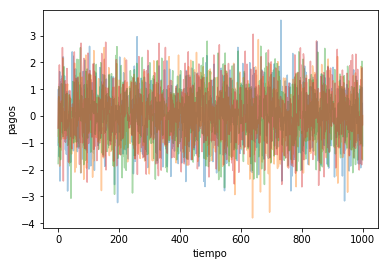

In [44]:
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('tiempo')
plt.ylabel('pagos')

In [45]:
def ponderaciones(n):
    
    k = np.random.rand(n)
    return k / sum(k)

ponderaciones(n_activos)

array([ 0.34363371,  0.36801984,  0.13146706,  0.15687939])

In [46]:
def portafolio(pagos):

    p = np.asmatrix(np.mean(pagos, axis=1))
    w = np.asmatrix(ponderaciones(pagos.shape[0]))
    C = np.asmatrix(np.cov(pagos))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    

    if sigma > 2:
        return portafolio(pagos)
    return mu, sigma

In [47]:
n_port = 500
means, stds = np.column_stack([
    portafolio(return_vec) 
    for _ in range(n_port)
])

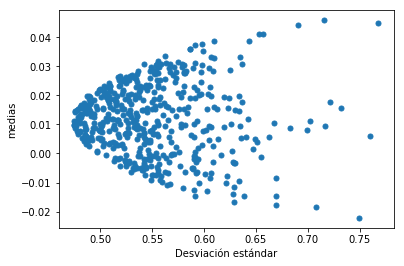

In [48]:
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('Desviación estándar')
plt.ylabel('medias')
plt.show()